In [1]:
# !pip install pandas

In [2]:
import pandas as pd
import os 
from glob import glob
import numpy as np
from pathlib import Path

#this function plots the numbers as a graph
import matplotlib.pyplot as plt
# Use the line below to show inline in a notebook
%matplotlib inline

In [3]:
current_path = os.getcwd()+'/'
dataset_path =  current_path+'Collected Datasets/'

In [4]:
#this function enable to provide the sets in a list based format
training_sets =[]
development_sets =[]
test_sets =[]
for path in Path(dataset_path).rglob('*.txt'):
    my_paths = str(path.absolute())
    if '.train.' in my_paths:
        training_sets.append(my_paths)
    elif '.dev.' in my_paths:
        development_sets.append(my_paths)
    elif '.test.' in my_paths:
        test_sets.append(my_paths)

In [5]:
training_sets

['/Users/vineeth/Dropbox/Code Base/Working_code/Collected Datasets/WASSA 2017/TRAINING/sadness-ratings-0to1.train.txt',
 '/Users/vineeth/Dropbox/Code Base/Working_code/Collected Datasets/WASSA 2017/TRAINING/joy-ratings-0to1.train.txt',
 '/Users/vineeth/Dropbox/Code Base/Working_code/Collected Datasets/WASSA 2017/TRAINING/anger-ratings-0to1.train.txt',
 '/Users/vineeth/Dropbox/Code Base/Working_code/Collected Datasets/WASSA 2017/TRAINING/fear-ratings-0to1.train.txt']

In [6]:
#this displays the interested colnms
col_names = ['id', 'message','emotion','intensity']

In [7]:
#this function reads the 3 datasets
train_1_df = pd.read_csv(training_sets[2],sep='\t', engine='python', names = col_names)
train_2_df = pd.read_csv(training_sets[3],sep='\t', engine='python', names = col_names)
train_3_df = pd.read_csv(training_sets[0],sep='\t', engine='python', names = col_names)
train_4_df = pd.read_csv(training_sets[1],sep='\t', engine='python', names = col_names)

dev_1_df = pd.read_csv(development_sets[2],sep='\t', engine='python', names = col_names)
dev_2_df = pd.read_csv(development_sets[3],sep='\t', engine='python', names = col_names)
dev_3_df = pd.read_csv(development_sets[0],sep='\t', engine='python', names = col_names)
dev_4_df = pd.read_csv(development_sets[1],sep='\t', engine='python', names = col_names)

test_1_df = pd.read_csv(test_sets[2],sep='\t', engine='python', names = col_names)
test_2_df = pd.read_csv(test_sets[3],sep='\t', engine='python', names = col_names)
test_3_df = pd.read_csv(test_sets[0],sep='\t', engine='python', names = col_names)
test_4_df = pd.read_csv(test_sets[1],sep='\t', engine='python', names = col_names)

In [8]:
#this sets the threshold to 0.2 so that the intesity of the text is identified
threshold = 0.2

In [9]:
#this function aappends the 3 datasets
train_df = train_1_df.append(train_2_df.append(train_3_df.append(train_4_df)))
dev_df = dev_1_df.append(dev_2_df.append(dev_3_df.append(dev_4_df)))
test_df = test_1_df.append(test_2_df.append(test_3_df.append(test_4_df)))

In [10]:
# count of each emotion class contributing to the normal class
def get_counts_each_emotion_2_normal_class(data_df):
    
    fear_count_normal = len(data_df[(data_df.emotion == 'fear') & (data_df.intensity<threshold)])
    sadness_count_normal = len(data_df[(data_df.emotion == 'sadness') & (data_df.intensity<threshold)])
    anger_count_normal = len(data_df[(data_df.emotion == 'anger') & (data_df.intensity<threshold)])
    joy_count_normal = len(data_df[(data_df.emotion == 'joy') & (data_df.intensity<threshold)])

    dict_count = {
    'fear':fear_count_normal,
    'sadness':sadness_count_normal,
    'anger':anger_count_normal,
    'joy':joy_count_normal,
    'count':fear_count_normal+sadness_count_normal+anger_count_normal+joy_count_normal
     }

    return dict_count

In [11]:
get_counts_each_emotion_2_normal_class(train_df)

{'fear': 67, 'sadness': 35, 'anger': 37, 'joy': 61, 'count': 200}

In [12]:
get_counts_each_emotion_2_normal_class(dev_df)

{'fear': 2, 'sadness': 5, 'anger': 2, 'joy': 8, 'count': 17}

In [13]:
get_counts_each_emotion_2_normal_class(test_df)

{'fear': 59, 'sadness': 32, 'anger': 21, 'joy': 55, 'count': 167}

In [14]:
def print_normal_class(data_df,emotion_class):
    return data_df[(data_df.emotion == emotion_class) & (data_df.intensity<threshold)]
    

In [15]:
print_normal_class(train_df,emotion_class='fear').sample(n=8)

,id,message,emotion,intensity
1125,21125,Ha! @mquirk @joshuahoodbooks Got your book aft...,fear,0.125
1085,21085,It's not always how you #start it's how you #F...,fear,0.188
1131,21131,"#rocklandcounty get to ravis in suffern, ny. G...",fear,0.125
1094,21094,@pixietangerine @hatersbackoff im so exited!! ...,fear,0.188
1112,21112,Study finds #awe &amp; #wonder of something gr...,fear,0.146
1133,21133,Jeans with fake pockets,fear,0.125
1140,21140,"Don't #worry if you're not the best , if you a...",fear,0.104
1103,21103,@turoturok We're glad to hear that everything...,fear,0.167


In [16]:
print_normal_class(train_df,emotion_class='sadness').sample(n=8)

,id,message,emotion,intensity
757,40757,@m_giacchino will this be aired on radio or fi...,sadness,0.188
763,40763,@urbaneprofessor roast them. Then risotto with...,sadness,0.167
772,40772,@RiRiMathew even when we're fighting I'm laugh...,sadness,0.146
759,40759,"TONIGHT - Fulford Arms, York \nTOMORROW - Bank...",sadness,0.188
780,40780,"#FF @ElizaNealsRocks Love &amp; support, alway...",sadness,0.125
755,40755,@hannah_2401 hannah stop being mournful and ch...,sadness,0.188
774,40774,Never a dull moment when talking to Nell 😂😂😂😂😋,sadness,0.146
771,40771,"Please bear with me, I'm not Twitter savvy😝 in...",sadness,0.146


In [17]:
print_normal_class(train_df,emotion_class='anger').sample(n=8)

,id,message,emotion,intensity
852,10852,rose incense are the best thing I've ever bought,anger,0.125
768,10768,Leveled at the half. Much better offense expec...,anger,0.182
746,10746,"@MHChat sadness with resentment is the past, s...",anger,0.172
825,10825,@ezlisteningdisc it doesn't offend me but it's...,anger,0.188
849,10849,Follow up. Follow through. Be #relentless. #su...,anger,0.125
832,10832,@JaredLeto Jared + #snap? 💘,anger,0.188
826,10826,Drop Snapchat names #bored #swap #pics,anger,0.188
838,10838,Vale! Vale! Sip sangria and taste tantalizing ...,anger,0.167


In [18]:
print_normal_class(train_df,emotion_class='joy').sample(n=8)

,id,message,emotion,intensity
802,30802,Wanted to get him a cake with sparkling candle...,joy,0.104
806,30806,"With a jovial Trump on his ass, Don King just ...",joy,0.104
811,30811,It is too fucking bright &amp; too fucking hot...,joy,0.096
804,30804,Sometimes I watch shitty tv to reinforce never...,joy,0.104
785,30785,sparkling or still? #terribledebatequestions,joy,0.146
820,30820,hate overthinking e v e r y t h i n g like i j...,joy,0.040
781,30781,Inquiries into alleged abuses by UK troops in ...,joy,0.160
776,30776,"Logically speaking, this can't be the worst I'...",joy,0.167


In [20]:
#this sets the threshold to 0.2 so that the intesity of the text is identified
threshold = 0.2

# this function adds normal emotion to the datsets, 
# if the intensity of the text is below 0.2 then the emotion of the text is normal
train_df['emotion'][train_df['intensity']<threshold] = 'normal'
dev_df['emotion'][dev_df['intensity']<threshold] = 'normal'
test_df['emotion'][test_df['intensity']<threshold] = 'normal'

<ipython-input-20-9c1a2e8f4097>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['emotion'][train_df['intensity']<threshold] = 'normal'
<ipython-input-20-9c1a2e8f4097>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_df['emotion'][dev_df['intensity']<threshold] = 'normal'
<ipython-input-20-9c1a2e8f4097>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['emotion'][test_df['intensity']<threshold] = 'normal'


In [21]:
#this function displays a sample of the text 
train_df.sample(n=100)

,id,message,emotion,intensity
772,20772,@residentadvisor thanks for getting back to me...,fear,0.396
841,10841,@thomeagle Just to help maintain and boost our...,normal,0.167
887,20887,Hahahah what a horrific penalty from bayer. 5 ...,fear,0.333
495,10495,#welfarereform should not be a 'model' for #snap.,anger,0.458
270,30270,#smile is the #respect we give everyone.,joy,0.583
...,...,...,...,...
829,10829,follow my girl tiff she only got 3 followers💖💘...,normal,0.188
4,40004,Im think ima lay in bed all day and sulk. Life...,sadness,0.934
33,30033,"This is the day You've made, \n\nLet us rehoi ...",joy,0.854
372,30372,@kevinmenzel annual reminder that i don't care...,joy,0.519


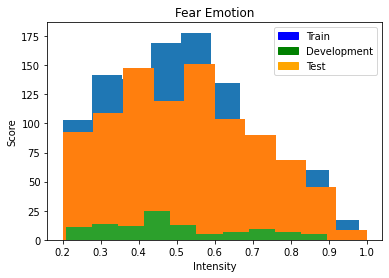

In [22]:
# Set the x axis label of the current axis.
plt.xlabel('Intensity')
# Set the y axis label of the current axis.
plt.ylabel('Score')
# Set a title 
plt.title('Fear Emotion')

fear_em = train_df[train_df["emotion"]=="fear"]
fear_em_d = dev_df[dev_df["emotion"]=="fear"]
fear_em_t = test_df[test_df["emotion"]=="fear"]
fear_em['intensity'].hist()
fear_em_t['intensity'].hist()
fear_em_d['intensity'].hist()

colors = {'Train':'Blue', 'Development':'Green', 'Test':'Orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.grid(False)
plt.show()

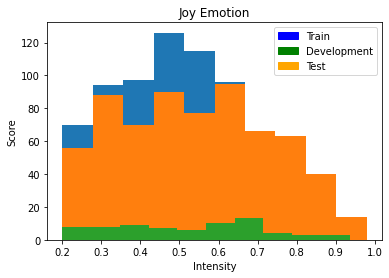

In [23]:
# Set the x axis label of the current axis.
plt.xlabel('Intensity')
# Set the y axis label of the current axis.
plt.ylabel('Score')
# Set a title 
plt.title('Joy Emotion')

joy_em = train_df[train_df["emotion"]=="joy"]
joy_em_d = dev_df[dev_df["emotion"]=="joy"]
joy_em_t = test_df[test_df["emotion"]=="joy"]
joy_em['intensity'].hist()
joy_em_t['intensity'].hist()
joy_em_d['intensity'].hist()

colors = {'Train':'Blue', 'Development':'Green', 'Test':'Orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.grid(False)
plt.show()

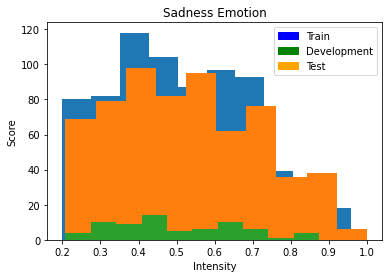

In [24]:
# Set the x axis label of the current axis.
plt.xlabel('Intensity')
# Set the y axis label of the current axis.
plt.ylabel('Score')
# Set a title 
plt.title('Sadness Emotion')

sadness_em = train_df[train_df["emotion"]=="sadness"]
sadness_em_d = dev_df[dev_df["emotion"]=="sadness"]
sadness_em_t = test_df[test_df["emotion"]=="sadness"]
sadness_em['intensity'].hist()
sadness_em_t['intensity'].hist()
sadness_em_d['intensity'].hist()

colors = {'Train':'Blue', 'Development':'Green', 'Test':'Orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.grid(False)
plt.show()

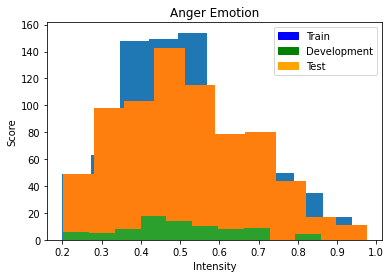

In [25]:
# Set the x axis label of the current axis.
plt.xlabel('Intensity')
# Set the y axis label of the current axis.
plt.ylabel('Score')
# Set a title 
plt.title('Anger Emotion')

anger_em = train_df[train_df["emotion"]=="anger"]
anger_em_d = dev_df[dev_df["emotion"]=="anger"]
anger_em_t = test_df[test_df["emotion"]=="anger"]
anger_em['intensity'].hist()
anger_em_t['intensity'].hist()
anger_em_d['intensity'].hist()

colors = {'Train':'Blue', 'Development':'Green', 'Test':'Orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.grid(False)
plt.show()

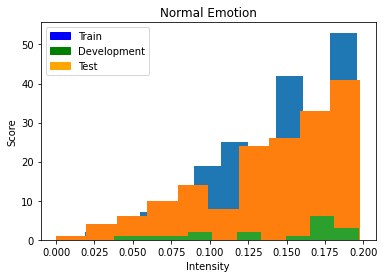

In [26]:
# Set the x axis label of the current axis.
plt.xlabel('Intensity')
# Set the y axis label of the current axis.
plt.ylabel('Score')
# Set a title 
plt.title('Normal Emotion')

normal_em = train_df[train_df["emotion"]=="normal"]
normal_em_d = dev_df[dev_df["emotion"]=="normal"]
normal_em_t = test_df[test_df["emotion"]=="normal"]
normal_em['intensity'].hist()
normal_em_t['intensity'].hist()
normal_em_d['intensity'].hist()

colors = {'Train':'Blue', 'Development':'Green', 'Test':'Orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.grid(False)
plt.show()

In [27]:
#this function provides the abels of the graph
train_y_values = train_df['emotion'].values
dev_y_values = dev_df['emotion'].values
test_y_values = test_df['emotion'].values

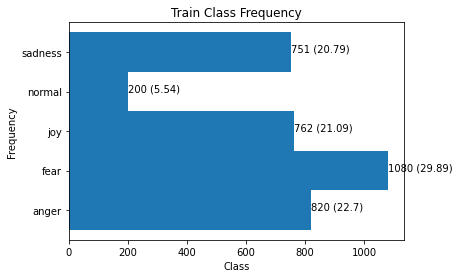

In [28]:
#this function gets the unique labels from the text
unique, counts = np.unique(train_y_values, return_counts=True)
percentage = counts*100/sum(counts)
plt.barh(unique, counts, 1)
plt.title('Train Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')

for index, value in enumerate(counts):
    plt.text(value, index, str(value)+' ('+str(round(percentage[index],2))+')')
    
plt.show()

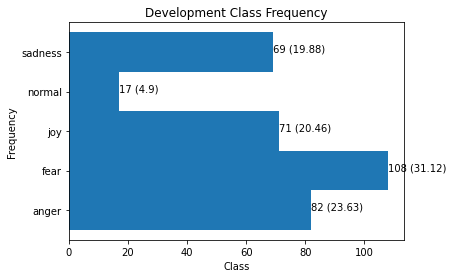

In [29]:
#this function outputs the distributed classes in dataset
unique, counts = np.unique(dev_y_values, return_counts=True)
percentage = counts*100/sum(counts)
plt.barh(unique, counts, 1)
plt.title('Development Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')

for index, value in enumerate(counts):
    plt.text(value, index, str(value)+' ('+str(round(percentage[index],2))+')')
    
plt.show()

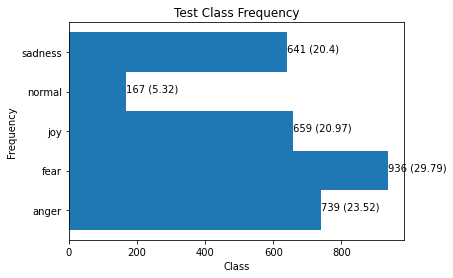

In [30]:
unique, counts = np.unique(test_y_values, return_counts=True)
percentage = counts*100/sum(counts)
plt.barh(unique, counts, 1)
plt.title('Test Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
for index, value in enumerate(counts):
    plt.text(value, index, str(value)+' ('+str(round(percentage[index],2))+')')
    
plt.show()

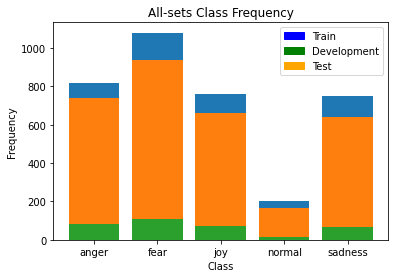

In [31]:
#this function compares the emotion from all the classes of the dataset
unique, counts = np.unique(train_y_values, return_counts=True)
plt.bar(unique, counts)

unique, counts = np.unique(test_y_values, return_counts=True)
plt.bar(unique, counts)

unique, counts = np.unique(dev_y_values, return_counts=True)
plt.bar(unique, counts)

plt.title('All-sets Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')



colors = {'Train':'Blue', 'Development':'Green', 'Test':'Orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.show()

In [32]:
train_df.to_csv(dataset_path+'train.csv', index=False)
test_df.to_csv(dataset_path+'test.csv', index=False)
dev_df.to_csv(dataset_path+'devel.csv', index=False)